# Data Cleaning & Preprocessing

In [13]:
import pandas as pd
import numpy as np

# Sample dataset with missing values and duplicates
data = {
    'ID': [1, 2, 2, 3, 4, 5, np.nan, 6],
    'Name': ['Alice', 'Bob', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'George'],
    'Age': [25, np.nan, 32, 28, 29, np.nan, 35, 40],
    'Salary': [50000, 60000, 60000, 70000, np.nan, 80000, 90000, np.nan]
}

df = pd.DataFrame(data)

print("Original DataFrame")
print(df)

# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Salary'].fillna(df['Salary'].mean(), inplace=True)

# Dropping duplicate rows
df.drop_duplicates(inplace=True)

# Dropping rows with missing 'ID'
df.dropna(subset=['ID'], inplace=True)

# Convert 'ID' to integer
df['ID'] = df['ID'].astype(int)

print("\n Cleaned DataFrame")
print(df)


Original DataFrame
    ID     Name   Age   Salary
0  1.0    Alice  25.0  50000.0
1  2.0      Bob   NaN  60000.0
2  2.0      Bob  32.0  60000.0
3  3.0  Charlie  28.0  70000.0
4  4.0    David  29.0      NaN
5  5.0     Emma   NaN  80000.0
6  NaN    Frank  35.0  90000.0
7  6.0   George  40.0      NaN

 Cleaned DataFrame
   ID     Name   Age        Salary
0   1    Alice  25.0  50000.000000
1   2      Bob  30.5  60000.000000
2   2      Bob  32.0  60000.000000
3   3  Charlie  28.0  70000.000000
4   4    David  29.0  68333.333333
5   5     Emma  30.5  80000.000000
7   6   George  40.0  68333.333333


C:\Users\USER\AppData\Local\Temp\ipykernel_14144\4262055242.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_14144\4262055242.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

to remove duplicated ID, you need to use 

df.drop_duplicates(subset=['ID'], inplace=True)

# Data Aggregation & Grouping

In [14]:
# Sample DataFrame
df['Department'] = np.random.choice(['HR', 'IT', 'Sales'], size=len(df))

# Group by 'Department' and compute mean salary & age
grouped = df.groupby('Department').agg({'Age': 'mean', 'Salary': 'mean'})

print("\n Average Age and Salary by Department:")
print(grouped)

print(df) # df 변화 확인용용


 Average Age and Salary by Department:
             Age        Salary
Department                    
HR          30.0  69444.444444
IT          34.0  69166.666667
Sales       28.5  55000.000000
   ID     Name   Age        Salary Department
0   1    Alice  25.0  50000.000000      Sales
1   2      Bob  30.5  60000.000000         HR
2   2      Bob  32.0  60000.000000      Sales
3   3  Charlie  28.0  70000.000000         IT
4   4    David  29.0  68333.333333         HR
5   5     Emma  30.5  80000.000000         HR
7   6   George  40.0  68333.333333         IT


# Feature Engineering (Creating New Insights)

In [15]:
df['Salary_Bracket'] = pd.cut(df['Salary'], bins=[0, 50000, 70000, 90000, np.inf], 
                              labels=['Low', 'Medium', 'High', 'Very High'])

print("\n DataFrame with Salary Bracket:")
print(df[['Name', 'Salary', 'Salary_Bracket']])

print(df)


 DataFrame with Salary Bracket:
      Name        Salary Salary_Bracket
0    Alice  50000.000000            Low
1      Bob  60000.000000         Medium
2      Bob  60000.000000         Medium
3  Charlie  70000.000000         Medium
4    David  68333.333333         Medium
5     Emma  80000.000000           High
7   George  68333.333333         Medium
   ID     Name   Age        Salary Department Salary_Bracket
0   1    Alice  25.0  50000.000000      Sales            Low
1   2      Bob  30.5  60000.000000         HR         Medium
2   2      Bob  32.0  60000.000000      Sales         Medium
3   3  Charlie  28.0  70000.000000         IT         Medium
4   4    David  29.0  68333.333333         HR         Medium
5   5     Emma  30.5  80000.000000         HR           High
7   6   George  40.0  68333.333333         IT         Medium


# Handling Outliers Using IQR (Interquartile Range)

In [16]:
# calculate IQR
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier condition
outliers = (df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR))

# Remove outliers
df_cleaned = df[~outliers] # outlier 제외한 값값

print("\n DataFrame after Removing Outliers:")
print(df_cleaned)



 DataFrame after Removing Outliers:
   ID     Name   Age        Salary Department Salary_Bracket
0   1    Alice  25.0  50000.000000      Sales            Low
1   2      Bob  30.5  60000.000000         HR         Medium
2   2      Bob  32.0  60000.000000      Sales         Medium
3   3  Charlie  28.0  70000.000000         IT         Medium
4   4    David  29.0  68333.333333         HR         Medium
5   5     Emma  30.5  80000.000000         HR           High
7   6   George  40.0  68333.333333         IT         Medium


# Data Visualization Using Matplotlib & Seaborn

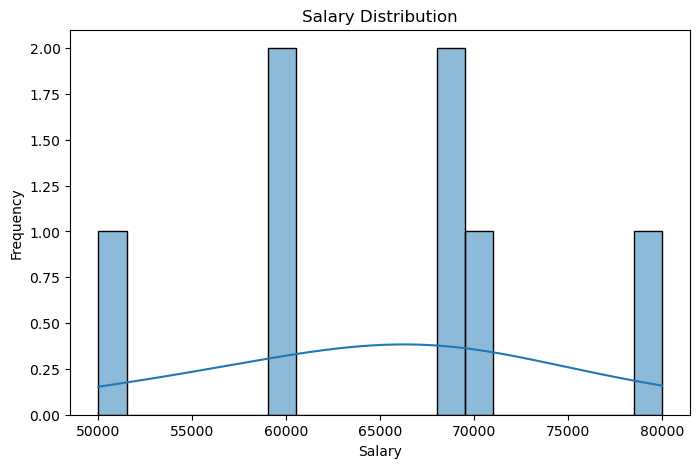

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot salary distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Salary'], bins=20, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()
